# SQLAlchemy Homework - Surfs Up!

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Use the provided [starter notebook](climate_starter.ipynb) and [hawaii.sqlite](Resources/hawaii.sqlite) files to complete your climate analysis and data exploration.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlche

In [19]:
## Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd

In [21]:
import datetime as dt

In [2]:
# Dependency require for step 2
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from sqlalchemy import inspect
from sqlalchemy import Column, Integer, String, Float, Text

In [6]:
from pprint import pprint

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [30]:
# inspect the database
inspector = inspect(engine)

# Exploratory Climate Analysis

-Design a query to retrieve the last 12 months of precipitation data and plot the results\
-Calculate the date 1 year ago from the last data point in the database\
-Perform a query to retrieve the data and precipitation scores\
-Save the query results as a Pandas DataFrame and set the index to the date column\
-Sort the dataframe by date\
-Use Pandas Plotting with Matplotlib to plot the data
-Use Pandas to print the summary statistics for the precipitation data.

In [31]:
# Display the table names
print(inspector.get_table_names())

['measurement', 'station']


In [36]:
# Use the Inspector to Get a list of column names and types for measurement table
measure_columns = inspector.get_columns('measurement')
for mc in measure_columns:
    print(mc['name'], mc['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [49]:
# Use the Inspector to Get a list of column names and types for stations tables
station_columns = inspector.get_columns('station')
for sc in station_columns:
    print(sc['name'], sc['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [38]:
# get a sense of the data in measurement
engine.execute('SELECT * FROM measurement Limit 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [39]:
# get a sense of the data in station
engine.execute('SELECT * FROM station Limit 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [68]:
# See the start date of the measurement data
Period_start = session.query(func.min(Measurement.date)).all()[0][0]
print(f"Period Start is: {Period_start}")
# See the end date of the measurement data
Period_end = session.query(func.max(Measurement.date)).all()[0][0]
print(f"Period End is: {Period_end}")

Period Start is: 2010-01-01
Period End is: 2017-08-23


In [84]:
# Determine the date 1 year before the Period End (last date)
print("----------------------------------------------------------------------------")
print("The period to analyze the precipitation is as follow:")

Date_Analysis_Start = dt.datetime.strptime(Period_end, '%Y-%m-%d') - dt.timedelta(days=365)
print(f"Analysis Start is:{Date_Analysis_Start}")
      
Date_Analysis_End = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(f"Analysis End is:{Date_Analysis_End}")

print("----------------------------------------------------------------------------")

----------------------------------------------------------------------------
The period to analyze the precipitation is as follow:
Analysis Start is:2016-08-23 00:00:00
Analysis End is:2017-08-23
----------------------------------------------------------------------------


In [83]:
# Checking the limits of precipitation
# See the low value of precipitation data
prcp_start = session.query(func.min(Measurement.prcp)).all()[0][0]
print(f"The minimum value is: {prcp_start}")

# See the high value of precipitation data
prcp_end = session.query(func.max(Measurement.prcp)).all()[0][0]
print(f"The minimum value is: {prcp_end}")

The minimum value is: 0.0
The minimum value is: 11.53


In [123]:
# Perform a query to retrieve date and precipitation from the measurement data and data sort by date
measurement = session.query(Measurement.id, Measurement.station, Measurement.date, \
                            Measurement.prcp, Measurement.tobs).\
                            order_by(Measurement.date.desc()).all()
measurement

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

In [124]:
# Separate Date and Precipitation from measurement and save into separate lists
measurement_id = [measurement[0] for measurement in measurement]
measurement_station = [(measurement[1]) for measurement in measurement]
measurement_date = [(measurement[2]) for measurement in measurement]
measurement_prcp = [(measurement[3]) for measurement in measurement]
measurement_tobs = [(measurement[4]) for measurement in measurement]

measurement_date_dt = pd.to_datetime(measurement_date, format= "%Y/%m/%d")    

In [132]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame({"Date": measurement_date_dt , 'Precipitation':measurement_prcp})
precipitation_df

# Create the index for date and precipitation
precipitation_df_index = precipitation_df[precipitation_df.Date.isin\
                                          (pd.date_range(start='2016-08-23',end='2017-08-23'))]
precipitation_df_index

,Date,Precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.05
2226,2016-08-23,NaN
2227,2016-08-23,0.02
2228,2016-08-23,1.79


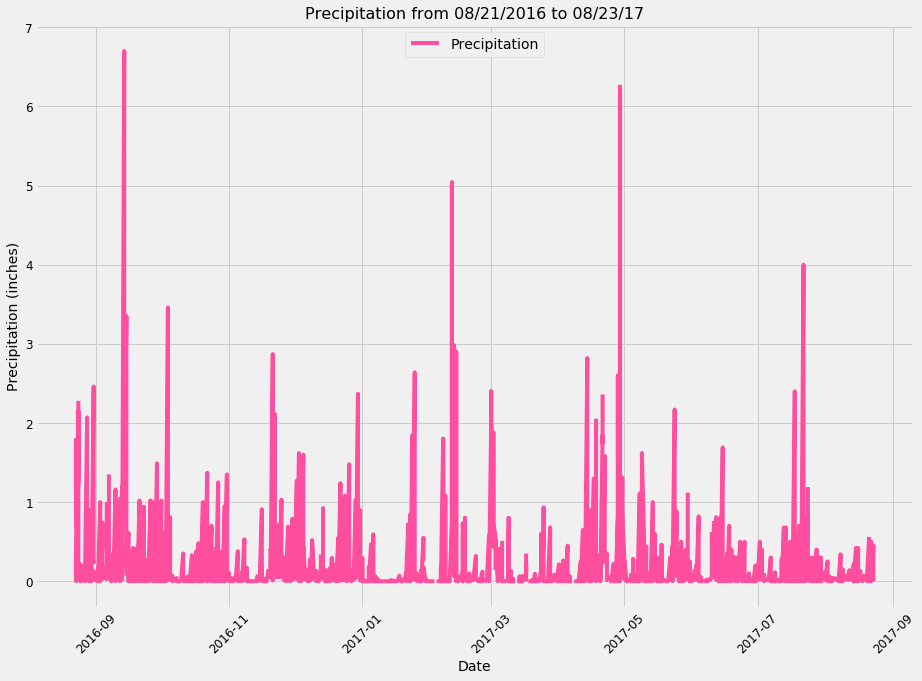

<Figure size 432x288 with 0 Axes>

In [214]:
# Bring in the colors from Hawaii
hawaiian_hibiscus_hex_palette = ["#ffa4cd", "#ff4e9e", "#ff0040", "#ffcd55", "#ffa700"]

# Define the bar chart
fig, ax = plt.subplots(figsize=(14,10))
plt.plot(precipitation_df_index["Date"],precipitation_df_index["Precipitation"], color ="#ff4e9e")

ax.set_xlabel("Date", size= 14)
ax.set_ylabel("Precipitation (inches)", size = 14)
ax.set_title("Precipitation from 08/21/2016 to 08/23/17", size= 16)
plt.xticks(rotation=45, size= 12)
plt.yticks(size= 12)
plt.legend(["Precipitation"],loc= 'upper center')

#Show the figure
plt.show()

#Save image
plt.savefig("Results/Precipitation.png")

In [135]:
# Use Pandas to print the summary statistics for the precipitation data.
precipitation_df_index.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis
* Design a query to calculate the total number of stations.
* Design a query to find the most active stations.
  * List the stations and observation counts in descending order.
  * Which station has the highest number of observations?
  * Hint: You may need to use functions such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.
* Design a query to retrieve the last 12 months of temperature observation data (tobs).
  * Filter by the station with the highest number of observations.
  * Plot the results as a histogram with `bins=12`.

In [144]:
# Design a query to calculate the total number of stations.
number_stations = session.query(Measurement.station).distinct().count()
print("There are " + str(number_stations) +" stations available.")

There are 9 stations available.


In [150]:
# Design a query to find the most active stations
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_station = engine.execute(
                    '''
                    SELECT measurement.station, COUNT(measurement.station)
                    FROM measurement
                    GROUP BY measurement.station
                    ORDER BY COUNT(measurement.station) DESC;
                    ''').fetchall()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [154]:
# Extract the active station using code, from the data listed above I can visualize that the first station
# is the most active. 
Active_station = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()


# the name of the most active station is:
Most_Active_Station = str(Active_station[0][0]) 
print(f'The Station Most Active is {Most_Active_Station}')

The Station Most Active is USC00519281


In [158]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
engine.execute('''
                SELECT  MIN(measurement.tobs), Max(measurement.tobs), AVG(measurement.tobs)
                FROM measurement
                WHERE measurement.station = 'USC00519281';
                ''').fetchall()

[(54.0, 85.0, 71.66378066378067)]

In [159]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_temp_observ = engine.execute('''
                SELECT measurement.tobs, measurement.date
                FROM measurement
                WHERE measurement.date > '2016-08-23' AND measurement.station = 'USC00519281';''').fetchall()
most_temp_observ

[(77.0, '2016-08-24'),
 (80.0, '2016-08-25'),
 (80.0, '2016-08-26'),
 (75.0, '2016-08-27'),
 (73.0, '2016-08-28'),
 (78.0, '2016-08-29'),
 (77.0, '2016-08-30'),
 (78.0, '2016-08-31'),
 (80.0, '2016-09-01'),
 (80.0, '2016-09-02'),
 (78.0, '2016-09-03'),
 (78.0, '2016-09-04'),
 (78.0, '2016-09-05'),
 (73.0, '2016-09-06'),
 (74.0, '2016-09-07'),
 (80.0, '2016-09-08'),
 (79.0, '2016-09-09'),
 (77.0, '2016-09-10'),
 (80.0, '2016-09-11'),
 (76.0, '2016-09-12'),
 (79.0, '2016-09-13'),
 (75.0, '2016-09-14'),
 (79.0, '2016-09-15'),
 (78.0, '2016-09-16'),
 (79.0, '2016-09-17'),
 (78.0, '2016-09-18'),
 (78.0, '2016-09-19'),
 (76.0, '2016-09-20'),
 (74.0, '2016-09-21'),
 (77.0, '2016-09-22'),
 (78.0, '2016-09-23'),
 (79.0, '2016-09-24'),
 (79.0, '2016-09-25'),
 (77.0, '2016-09-26'),
 (80.0, '2016-09-27'),
 (78.0, '2016-09-28'),
 (78.0, '2016-09-29'),
 (78.0, '2016-09-30'),
 (77.0, '2016-10-01'),
 (79.0, '2016-10-02'),
 (79.0, '2016-10-03'),
 (79.0, '2016-10-04'),
 (79.0, '2016-10-05'),
 (75.0, '20

In [160]:
# Create a data frame to hold temperature observations
temp_observ_df = pd.DataFrame(most_temp_observ, columns = ['Temperature', 'Date'])
temp_observ_df 

,Temperature,Date
0,77.0,2016-08-24
1,80.0,2016-08-25
2,80.0,2016-08-26
3,75.0,2016-08-27
4,73.0,2016-08-28
...,...,...
346,77.0,2017-08-14
347,77.0,2017-08-15
348,76.0,2017-08-16
349,76.0,2017-08-17


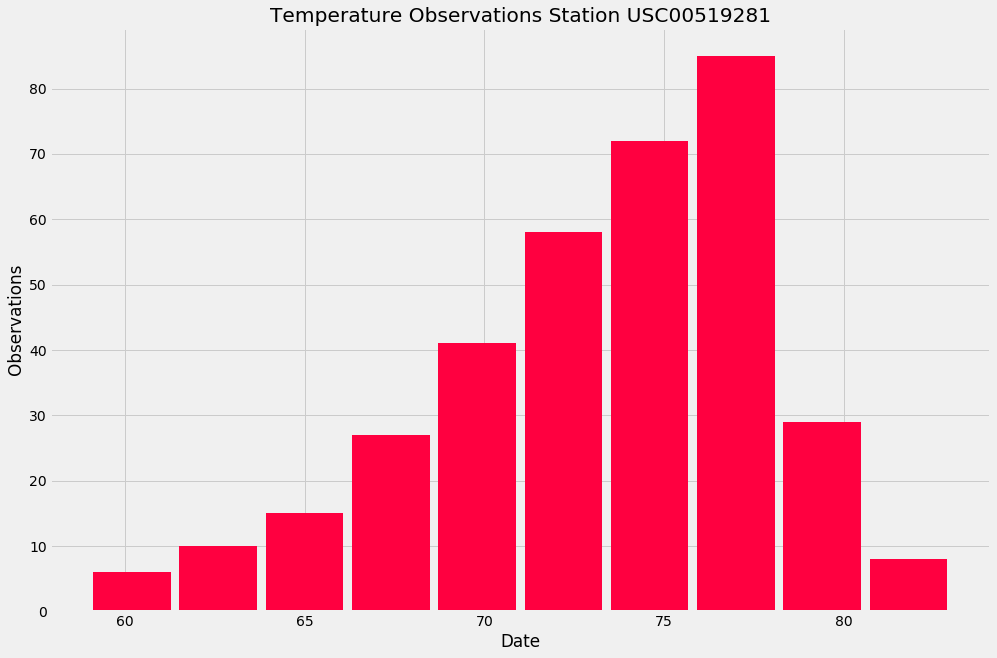

In [213]:
# Create a histogram to visualize the most Temperature Observations

# Bring in the colors from Hawaii
hawaiian_hibiscus_hex_palette = ["#ffa4cd", "#ff4e9e", "#ff0040", "#ffcd55", "#ffa700"]


ax = temp_observ_df.hist(column='Temperature', bins=10, range=None, density=None, \
                       weights=None, cumulative=False, bottom=None, \
                       histtype='bar', align='mid', orientation='vertical', \
                       rwidth=0.9, log=False, color="#ff0040",figsize=(15,10))
# looping                   
ax = ax[0]
for x in ax:

#Define the properties of the figure
    x.tick_params(axis="both", which="both", bottom="off", top="off", \
              labelbottom="on", left="off", right="off", labelleft="on")
    
    x.set_title("Temperature Observations Station USC00519281")
    x.set_xlabel("Date")
    x.set_ylabel("Observations")
    
#Save image
plt.savefig("Results/Temp_Observations.png")

In [163]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [142]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temps_trip = calc_temps('2012-02-28', '2012-03-05')
temps_trip 

[(62.0, 69.57142857142857, 74.0)]

In [143]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [172]:
# Define values to the chart
# Period:
date_start = dt.date(2012,2,28)
date_end = dt.date (2012,3,5)
Trip_duration_days = date_end - date_start
Trip_duration_days 

datetime.timedelta(days=6)

In [173]:
# Define date range
range_general = pd.date_range('2012-02-28', '2012-03-05', periods=5 , normalize=True)
range_general

DatetimeIndex(['2012-02-28 00:00:00', '2012-02-29 12:00:00',
               '2012-03-02 00:00:00', '2012-03-03 12:00:00',
               '2012-03-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [164]:
# Define value trip temperature
temps_trip[0][1]

69.57142857142857

In [165]:
# Define stats dictionary
trip_dict = {'tmin':temps_trip[0][0],'tavg':temps_trip[0][1],'tmax':temps_trip[0][2]}
yerr=trip_dict['tmax'] - trip_dict['tmin']

print(trip_dict) 
print(yerr)

{'tmin': 62.0, 'tavg': 69.57142857142857, 'tmax': 74.0}
12.0


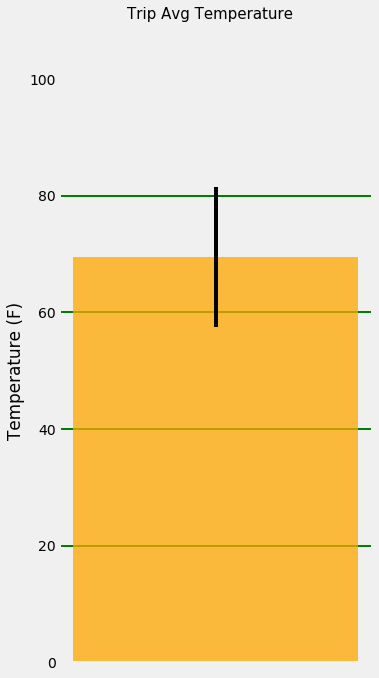

<Figure size 432x288 with 0 Axes>

In [212]:
# Build the plot for average temperature
plt.figure(figsize=(5,10))
plt.bar(1,trip_dict['tavg'],yerr=yerr, align='center',color='#ffa700', alpha= .75)
plt.xticks([])
plt.ylim(0,100)
plt.ylabel("Temperature (F)")
plt.grid(color='g', linestyle='-', linewidth=2,)
plt.suptitle("Trip Avg Temperature", size = 15)
plt.show()

#Save image
plt.savefig("Results/Trip_Ave_Temp.jpg")

# Step 2 - Climate App - Flask API
Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.
* Use FLASK to create your routes.

In [3]:
# See file app2

## Optional Challenge Assignment
### Daily Rainfall Average

In [167]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [186]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
Date_Start = '2017-01-01'
Date_Finish = '2017-01-07'

# Use the start and end date to create a range of dates
Range_dates = session.query(Measurement.date).\
    filter(Measurement.date >= Date_Start ).\
    filter(Measurement.date <= Date_Finish).\
    group_by(Measurement.date).all()

# List comprehension to get elements in the tuple from the Range_dates 
Trip_dates = [x[0] for x in Range_dates]

# Stip off the year and save a list of %m-%d strings
Trip_dates_no_year = [x[5:] for x in Trip_dates]


# Define the Date_Start and Date_Finish in Month and Day
MonthDay_Start = Trip_dates_no_year[0]
MonthDay_Finish = Trip_dates_no_year[-1]


# Loop through the list of %m-%d strings and calculate the normals for each date
# Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.

daily_normals = [session.query(func.min(Measurement.tobs),
                       func.avg(Measurement.tobs),
                       func.max(Measurement.tobs)).\
                 filter(func.strftime("%m-%d", Measurement.date) >= MonthDay_Start).\
                 filter(func.strftime("%m-%d", Measurement.date) <= MonthDay_Finish).\
                 group_by(func.strftime("%m-%d", Measurement.date)).all()]

daily_normals = daily_normals[0]
print("Aggregate Daily Normals for 07-01 to 07-07")
daily_normals



Aggregate Daily Normals for 07-01 to 07-07


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [187]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normals_df= pd.DataFrame(daily_normals,columns=['tmin', 'tavg', 'tmax'])
daily_normals_df

# Add the Trip_dates to the Data Frame
daily_normals_df['date']= Trip_dates

# Change datatype from element to datetime object on Pandas, makes x axis title to add 
daily_normals_df['date'] = pd.to_datetime(daily_normals_df['date'], format='%Y-%m-%d')

# Set index to date
daily_normals_df.set_index('date',inplace=True)

daily_normals_df


,tmin,tavg,tmax
date,,,
2017-01-01,62.0,69.153846,77.0
2017-01-02,60.0,69.396226,77.0
2017-01-03,62.0,68.909091,77.0
2017-01-04,58.0,70.000000,76.0
2017-01-05,56.0,67.964286,76.0
2017-01-06,61.0,68.964912,76.0
2017-01-07,57.0,68.543860,76.0


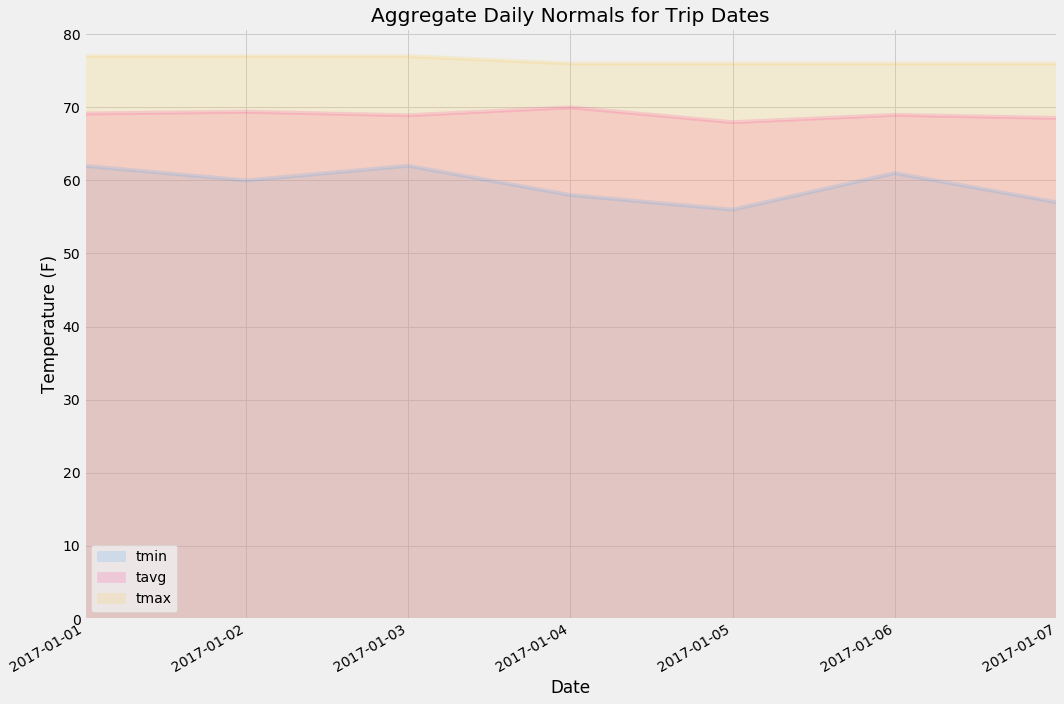

In [210]:
# Plot the daily normals as an area plot with `stacked=False`

# Bring in the colors from Hawaii 
hawaiian_hibiscus_hex_palette = [ "#57aaf2","#ff4e9e" ,"#ffcd55","#ffa4cd", "#43457f"]


daily_normals_df.plot(kind='area', figsize=(15,10), stacked=False, x_compat=True, \
                      color=hawaiian_hibiscus_hex_palette, alpha=0.2,\
                      title="Aggregate Daily Normals for Trip Dates")
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

#Save image
plt.savefig("Results/DailyNormals.png")

plt.show()